<a href="https://colab.research.google.com/github/profcintiapinho/python_basico/blob/main/10_Previsao_alugueis_bicicletas_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

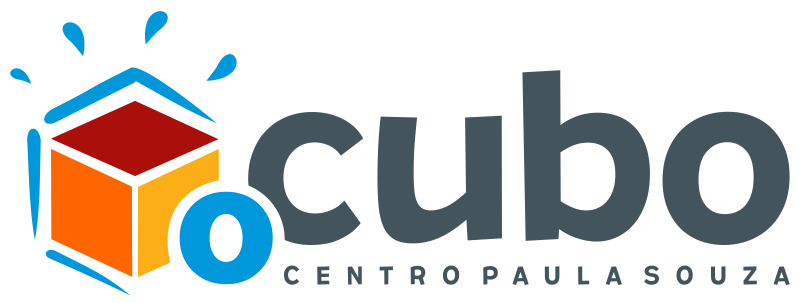

#REGRESSÃO LINEAR - PREVENDO ALUGUEL DE BICICLETAS

Um dos modelos de machine learning mais famosos é a Regressão linear, mas você sabe o que ele é e como funciona?

O termo **“Regressão” **surgiu em 1885 com o antropólogo, matemático e estatístico **Francis Galton**. As primeiras aplicações do método surgiram na Antropometria, ou seja, estudo das medidas e da matemática dos corpos humanos.
Ao estudar as **estaturas de pais e filhos**, Galton observou que **filhos de pais com altura baixa em relação à média tendem a ser mais altos que seus pais**, e **filhos de pais com estatura alta em relação à média tendem a ser mais baixos que seus pais**, ou seja, as alturas dos seres humanos em geral **tendem a regredir à média.**

Regressão linear é um tipo de algoritmo supervisionado, portanto antes de entender como funciona o algoritmo é importante conhecer o que seria aprendizado supervisionado.

**Conceitos importantes**

Antes de prosseguir, há alguns conceitos importantes que precisam estar bem claros na sua mente.

**Variável independente ou preditora**: é aquela que será passada para o modelo, tendo influência na variável que queremos encontrar. Por exemplo: Se queremos prever as vendas de sorvete, a estação do ano pode interferir nas vendas.

**Variável alvo ou dependente**: é a variável que queremos prever. No exemplo acima seria as vendas de sorvete.

O **aprendizado supervisionado** é aplicado quando tenta encontrar a relação entre a variável de alvo e as variáveis independentes.

Uma das características mais importantes neste aprendizado é que os dados usados no treino do modelo devem ser “rotulados”, ou seja, nos dados de treino eu preciso ter os dados anotados com o valores corretos e nós sabemos do resultado de saída.

Esse tipo de aprendizado é aplicado em 2 tipos de problemas: **Classificação e Regressão**.

Um modelo de machine learning aprende os padrões dos dados e cria matematicamente uma função para gerar previsões, portanto pode-se afirmar que em algoritmos supervisionados é gerado uma  função para gerar os valores de resposta.

**Regressão Linear**
Regressão linear é um algoritmo supervisionado de machine learning usado para estimar o valor de algo baseado em uma série de outros dados históricos, portanto olhando para o passado você pode “prever” o futuro.

Fonte: Laura Damaceno

# Importando as bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
%matplotlib inline

# Carregando a base de dados

In [ ]:
#essa célula permite acesso ao drive
#from google.colab import drive
#drive.mount('/content/drive')

In [7]:
#bike_rentals = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/bikePrevisao/bike_rental_hour.csv")
bike_rentals = pd.read_csv("https://raw.githubusercontent.com/profcintiapinho/python_basico/main/bike_rental_hour.csv")

## Visualizando os primeiros registros da base

In [8]:
bike_rentals.shape

(17379, 17)

In [9]:
bike_rentals

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


Entendendo a base de dados:

*   instant: índice de registro
*   dteday: data
*   season: estação do ano (1:inverno,2:primavera,3:verão,4:outono)
*   yr: ano (0:2011, 1:2012)
*   mnth: mês (1 a 12)
*   hr: hora (0 a 23)
*   holiday: o dia com clima é feriado ou não 
*   weekday: dia da semana
*   workingday: se o dia não for final de semana nem feriado, for 1, caso contrário será 0 - equivalente ao dia útil
*   weathersit: tempo
1.   limpo, poucas nuvens, parcialmente nublado
2.   névoa + nublado, névoa+nuvens partidas, névoa+poucas nuvens, névoa
3.   neve fraca, chuva fraca+trovoada+nuvens dispersas, chuva fraca+nuvens dispersas
4.   chuva forte + paletes de gelo + trovoada + névoa, neve + nevoeiro
*   temp: temperatura normalizada em graus Célsius. Os valores são derivados de (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (apenas na escala horária)
*   atemp: temperatura normal de sensação em graus Célsius. Os valores são derivados de (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (apenas na escala horária)
*   hum: umidade normalizada. Os valores são divididos em 100 (máximo)
*   windspeed: velocidade do vento normalizada. Os valores são divididos em 67 (máximo)
*   casual: número de usuários casuais
*   registered: número de usuários registrados
*   cnt: contagem do total de bicicletas alugadas, incluindo bicicletas causais e registradas















Pré análise dos dados e Pré-processamento

In [10]:
bike_rentals.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Distribuição do atributo cnt

<Figure size 864x576 with 0 Axes>

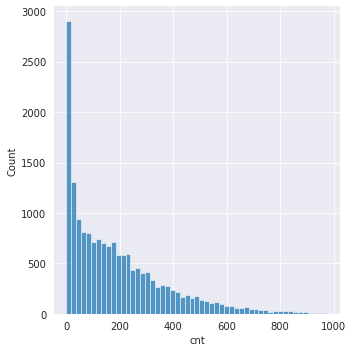

In [11]:
plt.figure(figsize=(12,8))
sns.set_style('darkgrid')
sns.displot(bike_rentals.cnt)

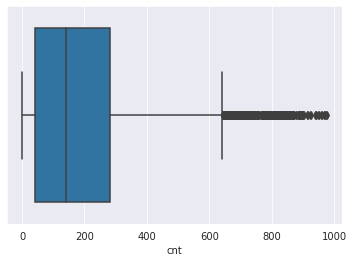

In [12]:
# mostra a média de biciletas alugadas
g = sns.boxplot(x=bike_rentals["cnt"])

# **Gráfico BoxPlot** 

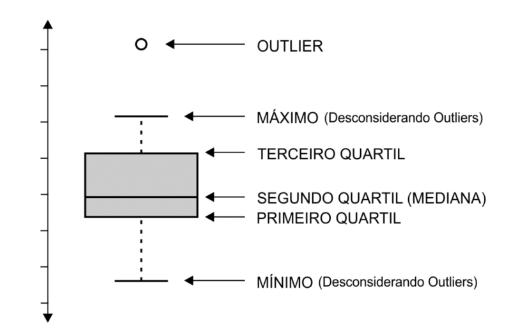

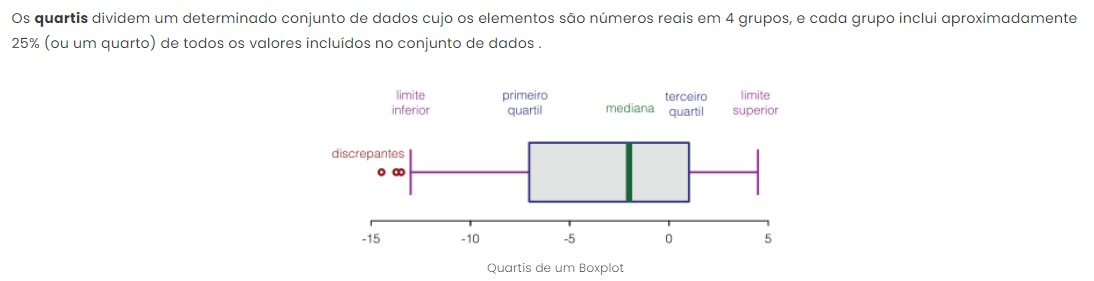

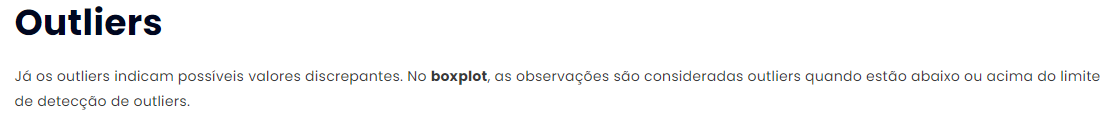

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


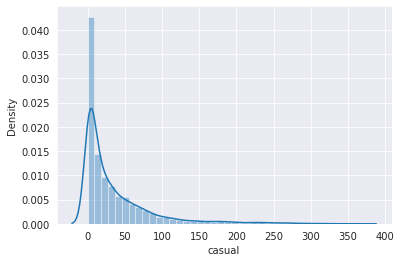

In [13]:
#Mostra a média de usuários casuais
sns.distplot(bike_rentals.casual, bins=40)

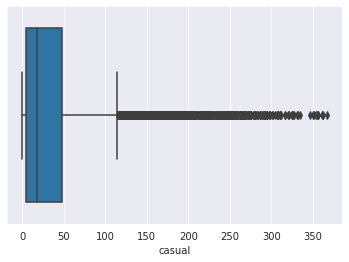

In [14]:
g = sns.boxplot(x=bike_rentals["casual"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


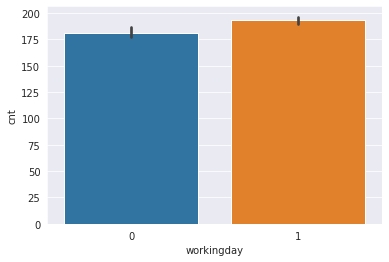

In [15]:
#Relação entre entre bicletas alugadas feriados e fim de semana(0) e dias da semana(1)
sns.barplot(bike_rentals.workingday,bike_rentals.cnt)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


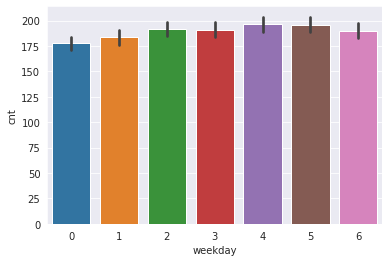

In [16]:
#Relação entre entre bicletas alugas com os dias da semana
sns.barplot(bike_rentals.weekday,bike_rentals.cnt)

Calculando a correlação entre as variáveis

In [ ]:
corr = bike_rentals.corr()
corr.style.background_gradient(cmap='coolwarm')

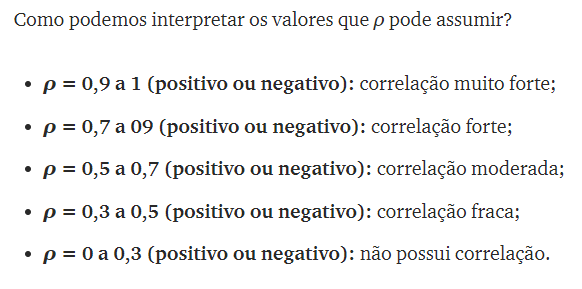

In [ ]:
# Mapa de calor
plt.figure(figsize = (10,10))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .82})
plt.title('Heatmap of Correlation Matrix')

A análise da correlação serve para verificar quais são os atributos que interessam mais. Assim podemos excluir aqueles que são menos importantes.

Para isso, armazenamos os dados obtidos da correlação de todos os atributos em uma variável e depois comparamos com o atributo alvo (cnt)

In [ ]:
correlations = bike_rentals.corr()
correlations['cnt']

Excluindo os atributos que são subcategorias do atributo alvo: **casual**, **registered**, **instant** e do **tipo date**. Depois da exclusão, o dataframe é armazenado na variavel **columns**

In [ ]:
columns = bike_rentals.columns.drop(['cnt','casual','dteday','registered','instant'])
columns

# Utilizando Machine Learning para realizar a previsão

Importando o método train_test_split para realizar a separação de dados em treino e teste

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Colunas que serão utilizadas => essas são as que tem maior correlação entre si
bike_rentals[columns]

Executando a separação dos dados em treino e teste

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(bike_rentals[columns],bike_rentals['cnt'], test_size=0.20, random_state=42)

Instanciando o algoritmo

In [ ]:
lr = LinearRegression()

Treinando o algoritmo e gerando um modelo de regressão

In [ ]:
model = lr.fit(X_train,y_train)

Realizando a predição com todos os valores de teste (X_test)

In [ ]:
resultado = model.predict(X_test)
resultado

Calculando o erro médio quadrático

In [ ]:
#mean_squared_error(y_test,resultado)

Computando o Score

In [ ]:
model.score(X_test,y_test)

Comparando os resultados aplicando os dados de treinamento

In [ ]:
resultado_treino = model.predict(X_train)

In [ ]:
#mean_squared_error(y_train,resultado_treino)

In [ ]:
model.score(X_train,y_train)

## Testando os resultados utilizando um modelo baseado em Árvore de Decisão

Treinando o modelo e gerando o modelo

In [ ]:
tree = DecisionTreeRegressor() #instancia do modelo
model_tree = tree.fit(X_train,y_train) # treino do modelo
resultado_tree = tree.predict(X_test) # previsões do modelo com base nos dados de Teste

Calculando o erro médio quadrático

In [ ]:
#mean_squared_error(y_test,resultado_tree)

Computando o Score

In [ ]:
model_tree.score(X_test,y_test)

# Melhorando os resultados utilizando Random Forest

In [ ]:
tree_rf = RandomForestRegressor()
model_rf = tree_rf.fit(X_train,y_train)
resultado_rf = model_rf.predict(X_test)

Calculando o erro médio quadrático

In [ ]:
#mean_squared_error(y_test,resultado_rf)

Computando o score

In [ ]:
model_rf.score(X_test,y_test)

Ajustando hiper-parametros do Random Forest

In [ ]:
from sklearn.model_selection import GridSearchCV

Especificando os parâmetros de tunning

In [ ]:
parametros = {'min_samples_leaf':[1,10],'min_samples_split':[2,10],'n_estimators':[100,250,500,750]}

Instanciando o Random Forest e GridSearch

In [ ]:
rf = RandomForestRegressor()
grid = GridSearchCV(rf,parametros)

Executando o Grid
(Esse processo é um pouco demorado pois vai ajustar todos os hiper parâmetros para os melhores valores para o modelo de ML)
Aproximadamente 15 min

A Pesquisa em Grade usa uma combinação diferente de todos os hiperparâmetros especificados e seus valores e calcula o desempenho de cada combinação e seleciona o melhor valor para os hiperparâmetros. Isso torna o processamento demorado e caro com base no número de hiperparâmetros envolvidos.

In [ ]:
grid.fit(X_train,y_train)

Verificando os melhores parâmetros

In [ ]:
grid.best_params_

Recuperando o melhor estimator

In [ ]:
rf_best = grid.best_estimator_

Gerando o resultado final

In [ ]:
resultado_final = rf_best.predict(X_test)
resultado_final

Calculando o erro médio quadrático

In [ ]:
mean_squared_error(y_test, resultado_final)

Computando o score

In [ ]:
rf_best.score(X_test,y_test)

Lista de todos os score de todos os modelos testados:

In [ ]:
# com Regressão Linear
print('Regressão Linear: ',model.score(X_test,y_test))

# com Árvore de Decisão
print('Arvore de Decisão: ',model_tree.score(X_test,y_test))

# com Random Forest
print('Random Forest: ',model_rf.score(X_test,y_test))

# com grid e Random Forest
print('Grid e RF: ',rf_best.score(X_test,y_test))

# Salvando o modelo

In [ ]:
#essa célula permite acesso ao drive
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import joblib
joblib.dump(rf_best, '/content/drive/MyDrive/Introducao_Python_CPS/BikePrevisaoModelo/model_rf_best.pkl')

In [ ]:
# Carregar o modelo a partir de um arquivo .pkl
#modelo_salvo = joblib.load('/content/drive/MyDrive/Introducao_Python_CPS/BikePrevisaoModelo/model_rf_best.pkl')
 
# Usar o modelo carregado para realizar uma previsão
#modelo_salvo.predict(X_test)

In [ ]:
X_test.head()

# Formato de Dados que devem ser passados para entrada de um projeto armazenado e fazer a previsão:
teste = np.array([['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday','workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed']])
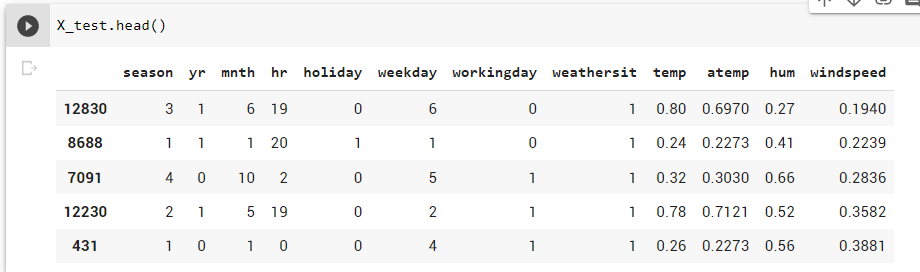

In [ ]:
#Nessa ordem
#season: estação do ano (1:inverno,2:primavera,3:verão,4:outono)
# yr --> Ano 1 = 2012 ou 0 = 2011
#mes --> 1 a 12
# hr -> 0 a 23
# holiday--> feridado ou nao (1ou 0)
# weekday --> Qual dia da semana --> 0 a 6
#workinday --> dia de trabalho ->1 / feriado ou fim de semana -> 0
# weathersit --> tempo --> limpo 1, nublado 2, chuva fraca ou garoa 3, chuva forte 4
# temp --> temperatura temperatura normalizada em graus Célsius (normalizado)
# atemp --> sensação de temperatura normalizada em graus Célsius (normalizado)
#humidade (normalizado)
#velocidade do vento (normalizado)

X = np.array([[1,1,1,10,1,6,0,3,0.8,0.6,0.5,0.15]])
teste_final = rf_best.predict(X)
teste_final

Como carregar um modelo de ML salvo